导入需要的库

In [ ]:
import matplotlib.pyplot as plt
# 首先导入所有必要的库
import numpy as np

# 设置样式
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

****

#### Sigmod 函数

****

函数定义：
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

导数：
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

图像：

In [ ]:
# Sigmoid函数及其导数实现
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


# 绘制图像
x = np.linspace(-5, 5, 500)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.title('Sigmoid函数')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivative(x), label='Sigmoid导数', color='red')
plt.title('Sigmoid导数')
plt.xlabel('x')
plt.ylabel('σ\'(x)')
plt.legend()

plt.tight_layout()
plt.show()

特点：
- 将输入压缩到(0,1)区间，当输入的值大致在 <-6 或者 >6 时，意味着输入任何值得到的激活值都是差不多的，这样会丢失部分的信息
- 比如：输入100和输出10000经过sigmoid的激活值几乎都是等于1的，但是输入的数据之间相差100倍的信息就丢失了

分析原因：

In [ ]:
# 标记信息丢失区间
plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid_derivative(x), label='Sigmoid导数', color='red')

# 标记导数接近0的区域
plt.fill_between(x, sigmoid_derivative(x), where=(x>2.5)|(x<-2.5),
                 color='red', alpha=0.3, label='梯度消失区域')
plt.title('Sigmoid导数及信息丢失区间')
plt.xlabel('x')
plt.ylabel('σ\'(x)')
plt.legend()
plt.show()

由图像可知：
- 当|x| > 2.5 时，导数接近 0，梯度几乎消失
- 此时网络参数将更新极其缓慢，意味着在这些区域输入的变化几乎不会影响输出，网络难以学习
- 在深度网络中，多层小梯度相乘会导致梯度指数级减小

一般来说，sigmoid网络在5层之内就会产生梯度消失现象。而且，该激活函数并不是以0为中心的，所以在实践中这种激活函数使用的很少。sigmoid函数一般只用于二分类的输出层。

****

#### Tanh 函数

****

函数定义：
$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

导数：
$$
\tanh'(x) = 1 - \tanh^2(x)
$$

图像：

In [ ]:
# Tanh函数及其导数实现
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 绘制图像
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, tanh(x), label='Tanh', color='blue')
plt.title('Tanh函数')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, tanh_derivative(x), label='Tanh导数', color='red')
plt.title('Tanh导数')
plt.xlabel('x')
plt.ylabel('tanh\'(x)')
plt.legend()

plt.tight_layout()
plt.show()

特点：
- 将输入压缩到(-1,1)区间，当输入在 <-3 或者 >3 时将被映射为 -1 或者 1。
- 与Sigmoid相比，它是以0为中心的，且梯度相对于sigmoid大，使得其收敛速度要比Sigmoid快，减少迭代次数。

分析原因：

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x, tanh_derivative(x), label='Tanh导数', color='red')

# 标记导数接近0的区域
plt.fill_between(x, tanh_derivative(x), where=(x>2.5)|(x<-2.5),
                color='red', alpha=0.3, label='梯度消失区域')
plt.title('Tanh导数及信息丢失区间')
plt.xlabel('x')
plt.ylabel('tanh\'(x)')
plt.legend()
plt.show()

由图像可知：
- 当|x|>2.5时，导数接近0，存在梯度消失问题，但相比Sigmoid，梯度消失的程度较轻
- 其导数值范围是(0,1]，而Sigmoid是(0,0.25]

若使用时可在隐藏层使用tanh函数，如RNN和LSTM网络中的隐藏层，在输出层使用sigmoid函数。

****

#### ReLU 函数

****

函数定义：
$$
\text{ReLU}(x) = \max(0, x)
$$

导数：
$$
\text{ReLU}'(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

图像：

In [ ]:
# ReLU函数及其导数实现
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 绘制图像
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, relu(x), label='ReLU', color='blue')
plt.title('ReLU函数')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, relu_derivative(x), label='ReLU导数', color='red')
plt.title('ReLU导数')
plt.xlabel('x')
plt.ylabel('ReLU\'(x)')
plt.legend()

plt.tight_layout()
plt.show()

特点：
- ReLU 激活函数将小于 0 的值映射为 0，而大于 0 的值则保持不变，它更加重视正信号，而忽略负信号，这种激活函数运算更为简单，能够提高模型的训练效率。
- 当 x<0 时，ReLU 导数为 0，而当 x>0 时，则不存在饱和问题。所以，ReLU 能够在 x>0 时保持梯度不衰减，从而缓解梯度消失问题。
- 然而，随着训练的推进，部分输入会落入小于 0 区域，导致对应权重无法更新。这种现象被称为“神经元死亡”

采用 Sigmoid 函数，计算量大（指数运算)，反向传播求误差梯度时，计算量相对大，而采用ReLU激活函数，整个过程的计算量节省很多。

Sigmoid 函数反向传播时，很容易就会出现梯度消失的情况，从而无法完成深层网络的训练。ReLU 会使一部分神经元的输出为0，这样就造成了网络的稀疏性，并且减少了参数的相互依存关系，缓解了过拟合问题的发生，适用于CNN等计算密集型网络和需要快速收敛的场景。

****

#### Softmax 函数

****

Softmax函数将任意实值向量转换为概率分布

函数定义：
$$
\text{Softmax}(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}} \quad \text{对于} \ i = 1, ..., n
$$

其中：
- $\mathbf{x} = (x_1, x_2, ..., x_n)$ 是输入向量
- 输出向量的每个元素 $\text{Softmax}(\mathbf{x})_i \in (0,1)$
- 所有输出元素之和为 $1$ ：$\sum_{i=1}^n \text{Softmax}(\mathbf{x})_i = 1$

Softmax的导数是一个Jacobian矩阵：
$$
\frac{\partial \text{Softmax}(\mathbf{x})_i}{\partial x_j} =
\begin{cases}
\text{Softmax}(\mathbf{x})_i (1 - \text{Softmax}(\mathbf{x})_i) & \text{如果 } i = j \\
-\text{Softmax}(\mathbf{x})_i \text{Softmax}(\mathbf{x})_j & \text{如果 } i \neq j
\end{cases}
$$

图像：

In [ ]:
# Softmax函数实现
def softmax(x):
    e_x = np.exp(x - np.max(x))  # 数值稳定处理
    return e_x / e_x.sum()

# 1D情况下的Softmax及其导数
x_softmax = np.linspace(-5, 5, 500)
y_softmax = softmax(x_softmax)
softmax_derivative_1d = y_softmax * (1 - y_softmax)  # 1D特殊情况

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_softmax, y_softmax, label='Softmax', color='blue')
plt.title('Softmax函数(1D输入)')
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_softmax, softmax_derivative_1d, label='Softmax导数(1D)', color='red')
plt.title('Softmax导数(1D情况)')
plt.xlabel('x')
plt.ylabel('Softmax\'(x)')
plt.legend()

plt.tight_layout()
plt.show()

特点：
- Softmax 就是将网络输出的 logits 通过 softmax函数，就映射成为(O,1)的值
- 这些值的累和为 1（满足概率的性质），那么我们将它理解成概率，选取概率最大（也就是值对应最大的）节点，作为我们的预测目标类别。

分析原因：

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(x_softmax, softmax_derivative_1d, label='Softmax导数', color='red')

# 标记导数接近0的区域
plt.fill_between(x_softmax, softmax_derivative_1d,
                 where=(x_softmax>2)|(x_softmax<-2),
                 color='red', alpha=0.3, label='梯度消失区域')
plt.title('Softmax导数及信息丢失区间(1D情况)')
plt.xlabel('x')
plt.ylabel('Softmax\'(x)')
plt.legend()
plt.show()

由图像可知：
- 当输入值差异很大时，输出接近one-hot编码，导数接近0
- 数值不稳定问题需要特殊处理(减去最大值)
- 多维情况下导数形成 Jacobian 矩阵，非对角线元素不为零

Softmax 不是严格意义上的信息“丢失”，而是信息“压缩”甚至“掩盖”，在数值差异过大的情况下可能带来梯度消失、训练不稳定等问题。尤其在深层网络或大类分类中更明显。



C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 24809 (\N{CJK UNIFIED IDEOGRAPH-60E9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 32602 (\N{CJK UNIFIED IDEOGRAPH-7F5A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 26356 (\N{CJK UNIFIED IDEOGRAPH-66F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LYS\AppData\Local\Temp\ipykernel_35036\3678593576.py:39: UserWarning: Glyph 24378 (\N{CJK UNIFIE

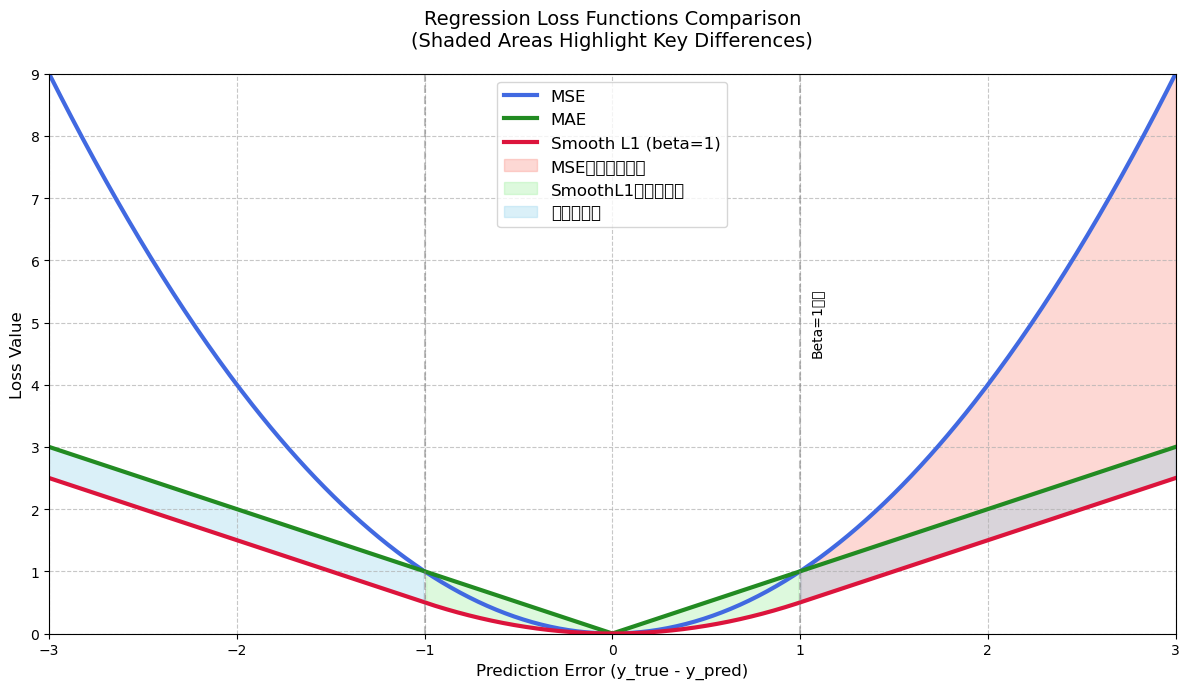

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 500)  # 增加采样点使曲线更平滑
mse = x**2
mae = np.abs(x)
smooth_l1 = np.where(np.abs(x)<1, 0.5*x**2, np.abs(x)-0.5)

plt.figure(figsize=(12, 7))

# 绘制曲线
plt.plot(x, mse, label='MSE', linewidth=3, color='royalblue')
plt.plot(x, mae, label='MAE', linewidth=3, color='forestgreen')
plt.plot(x, smooth_l1, label='Smooth L1 (beta=1)', linewidth=3, color='crimson')

# 添加阴影区域
plt.fill_between(x, mse, smooth_l1, where=(x>1),
                 color='salmon', alpha=0.3, label='MSE惩罚更强区域')
plt.fill_between(x, mae, smooth_l1, where=(np.abs(x)<1),
                 color='lightgreen', alpha=0.3, label='SmoothL1平滑过渡区')
plt.fill_between(x, mae, smooth_l1, where=(np.abs(x)>1),
                 color='skyblue', alpha=0.3, label='线性处理区')

# 添加阈值标记
plt.axvline(1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(-1, color='gray', linestyle='--', alpha=0.5)
plt.text(1.05, 5, 'Beta=1阈值', rotation=90, va='center')

# 图表装饰
plt.legend(fontsize=12, loc='upper center')
plt.xlabel('Prediction Error (y_true - y_pred)', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Regression Loss Functions Comparison\n(Shaded Areas Highlight Key Differences)',
          fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-3, 3)
plt.ylim(0, 9)

plt.tight_layout()
plt.show()